# AutoML with Neuraxle

We choose a model using AutoML with Neuraxle. We test Random Forest, Ridge Regression and Support Vector Machine. The goal is to learn Neuraxle. 

### Importing Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from neuraxle.hyperparams.distributions import Choice, RandInt, Boolean, LogUniform
from neuraxle.hyperparams.space import HyperparameterSpace
from neuraxle.metaopt.auto_ml import AutoML, RandomSearchHyperparameterSelectionStrategy, ValidationSplitter, \
    HyperparamsJSONRepository
from neuraxle.metaopt.callbacks import ScoringCallback
from neuraxle.pipeline import Pipeline
from neuraxle.steps.flow import ChooseOneStepOf
from neuraxle.steps.numpy import NumpyRavel
from neuraxle.steps.output_handlers import OutputTransformerWrapper
from neuraxle.steps.sklearn import SKLearnWrapper

### Loading the data

In [3]:
path = '/Users/louispht/Dropbox/git_projects/news_classifier/Data cleaning/Pickles/'

# Dataframe
with open(path + 'df_all.pickle', 'rb') as data:
    df_all = pickle.load(data)

# features_train
with open(path + 'features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)

# y_train
with open(path + 'y_train.pickle', 'rb') as data:
    y_train = pickle.load(data)

# features_test
with open(path + 'features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)

# y_test
with open(path + 'y_test.pickle', 'rb') as data:
    y_test = pickle.load(data)

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13807 entries, 0 to 13806
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            13807 non-null  object
 1   content          13807 non-null  object
 2   link             13807 non-null  object
 3   category         13807 non-null  object
 4   news_length      13807 non-null  int64 
 5   cleaned_content  13807 non-null  object
dtypes: int64(1), object(5)
memory usage: 647.3+ KB


In [5]:
features_train.shape

(12335, 500)

In [6]:
features_test.shape

(1472, 500)

In [7]:
y_train.shape

(12335,)

In [8]:
y_test.shape

(1472,)

### Choosing the model 

In [9]:
ridge_classifier = Pipeline([
        OutputTransformerWrapper(NumpyRavel()),
        SKLearnWrapper(RidgeClassifier(), HyperparameterSpace({
            'alpha': Choice([(0.0, 1.0, 10.0), (0.0, 10.0, 100.0)]),
            'fit_intercept': Boolean(),
            'normalize': Boolean()
        }))
    ]).set_name('RidgeClassifier')

In [10]:
random_forest_classifier = Pipeline([
        OutputTransformerWrapper(NumpyRavel()),
        SKLearnWrapper(RandomForestClassifier(), HyperparameterSpace({
            'n_estimators': RandInt(50, 600),
            'criterion': Choice(['gini', 'entropy']),
            'min_samples_leaf': RandInt(2, 5),
            'min_samples_split': RandInt(1, 3),
            'bootstrap': Boolean()
        }))
    ]).set_name('RandomForestClassifier')

In [11]:
svm_classifier = Pipeline([
        OutputTransformerWrapper(NumpyRavel()),
        SKLearnWrapper(SVC(), HyperparameterSpace({
            'C': Choice([.0001, .001, .01, .1, 1.0]),
            'kernel': Choice(['linear', 'rbf', 'poly']),
            'gamma': Choice([.0001, .001, .01, .1, 1, 10, 100]),
            'degree': Choice([1,2,3,4,5])
        }))
    ]).set_name('SVMClassifier')

In [12]:
pipeline = Pipeline([
        ChooseOneStepOf([
            ridge_classifier,
            random_forest_classifier, 
            svm_classifier
        ])
    ])

In [13]:
auto_ml = AutoML(
        pipeline=pipeline,
        hyperparams_optimizer=RandomSearchHyperparameterSelectionStrategy(),
        validation_splitter=ValidationSplitter(test_size=0.20),
        scoring_callback=ScoringCallback(accuracy_score, higher_score_is_better=True),
        n_trials=7,
        epochs=1,
        hyperparams_repository=HyperparamsJSONRepository(cache_folder='cache'),
        refit_trial=True,
    )

In [14]:
auto_ml = auto_ml.fit(features_train, y_train)


trial 1/7
fitting trial 1/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi


trial 2/7
fitting trial 2/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi


trial 3/7
fitting trial 3/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi


trial 4/7
fitting trial 4/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi


trial 5/7
fitting trial 5/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi


trial 6/7
fitting trial 6/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi


trial 7/7
fitting trial 7/7 split 1/1
hyperparams: {
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__bootstrap": true,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__ccp_alpha": 0.0,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__class_weight": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__criterion": "gini",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_depth": null,
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifier__max_features": "auto",
    "ChooseOneStepOf__RandomForestClassifier__Optional(RandomForestClassifier)__SKLearnWrapper_RandomForestClassifi

best hyperparams:
{
    "ChooseOneStepOf": {
        "RandomForestClassifier": {
            "Optional(RandomForestClassifier)": {
                "SKLearnWrapper_RandomForestClassifier": {
                    "bootstrap": true,
                    "ccp_alpha": 0.0,
                    "class_weight": null,
                    "criterion": "gini",
                    "max_depth": null,
                    "max_features": "auto",
                    "max_leaf_nodes": null,
                    "max_samples": null,
                    "min_impurity_decrease": 0.0,
                    "min_impurity_split": null,
                    "min_samples_leaf": 1,
                    "min_samples_split": 2,
                    "min_weight_fraction_leaf": 0.0,
                    "n_estimators": 100,
                    "n_jobs": null,
                    "oob_score": false,
                    "random_state": null,
                    "verbose": 0,
                    "warm_start": false
           

In [15]:
best_pipeline = auto_ml.get_best_model()

### Checking Accuracy

In [16]:
y_pred = best_pipeline.predict(features_test)

In [17]:
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test accuracy score: ", accuracy)

Test accuracy score:  0.8029891304347826


In [18]:
y_train_pred = best_pipeline.predict(features_train)

In [19]:
training_accuracy = accuracy_score(y_true = y_train, y_pred = y_train_pred)
print("Train accuracy score: ", training_accuracy)

Train accuracy score:  0.8406972030806648


AutoML chose RandomForestClassifier, which performs slightly worst than the SVC model in our other model training file. However, the models were trained really fast, as oppposed to the RandomizedSearchCV we used in our other training. Thus, it would make sense that a more thorough analysis would give us even better models. This also gives a much cleaner code, as we were able to train simultaneously many models, instead of doing it one by one, as were our strategy. 

### Classification report and confusion matrix 

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Classification report
categories = {'actualite':0, 'sports':4, 'international':3, 'affaires':1, 'culture':2}
print("Classification report")
print(classification_report(y_test,y_pred, target_names=categories))

Classification report
               precision    recall  f1-score   support

    actualite       0.63      0.84      0.72       342
       sports       0.80      0.72      0.76       243
international       0.90      0.75      0.82       274
     affaires       0.79      0.80      0.80       220
      culture       0.97      0.85      0.91       393

     accuracy                           0.80      1472
    macro avg       0.82      0.79      0.80      1472
 weighted avg       0.82      0.80      0.81      1472



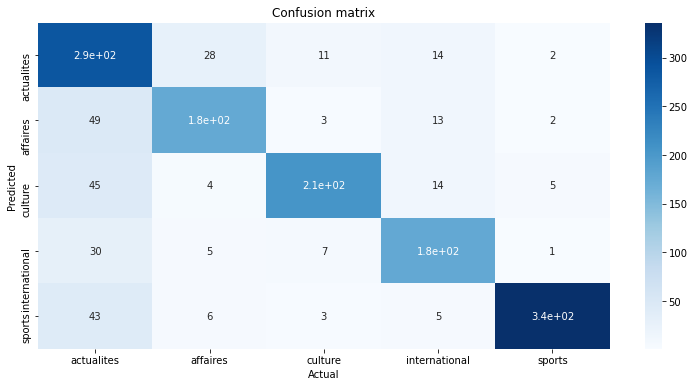

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_all_le
with open(path + 'df_all_le.pickle', 'rb') as data:
    df_all_le = pickle.load(data)
    
#Confusion matrix
aux_df = df_all_le[['category', 'label_enc']].drop_duplicates().sort_values('category')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

As usual, we see that our model has some difficulties with the 'actualites' category. This is partially due to the fact that this category is a bit more vague in terms of its content.

### Saving the model 

In [23]:
d = {
     'Model': 'AutoML',
     'Training Set Accuracy': training_accuracy,
     'Test Set Accuracy': accuracy
}

df_models_AutoML = pd.DataFrame(d, index=[0])

In [24]:
df_models_AutoML

,Model,Training Set Accuracy,Test Set Accuracy
0,AutoML,0.840697,0.802989


In [25]:
with open('Models/best_autoML.pickle', 'wb') as output:
    pickle.dump(best_pipeline, output)
    
with open('Models/df_models_autoML.pickle', 'wb') as output:
    pickle.dump(df_models_AutoML, output)